# Linear Regression using Scikit-Learn
There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms used through-out this course.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [6]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

### Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

In [44]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


In [46]:
sgdr = SGDRegressor(max_iter=125)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=125)
number of iterations completed: 111, number of weight updates: 10990.0


In [47]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [109.85 -21.01 -32.38 -38.07], b:[363.15]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [49]:
y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.23 485.65 389.49 491.81]
Target values 
[300.  509.8 394.  540. ]


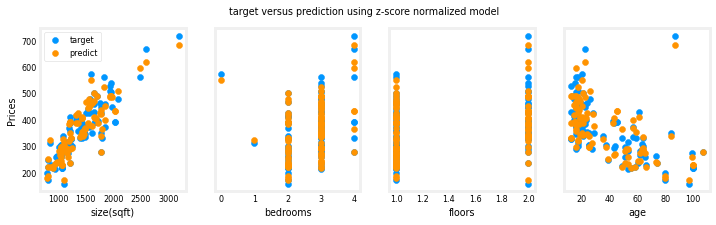

In [57]:
fig,ax = plt.subplots(1,4,figsize=(12,3),sharey=True)
fig.suptitle("target versus prediction using z-score normalized model")
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"],label="predict")
ax[0].set_ylabel("Prices"); ax[0].legend()

plt.show()